In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# prepare the credit dataset
df = pd.read_csv('C:\dankook\DeepLearning_Cloud\data\liver.csv')
print(df.head())    
print(df.columns)   # column names

df_X = df.loc[:, df.columns != 'category']
df_y = df['category']

# Split the data into training/testing sets
train_X, test_X, train_y, test_y = \
    train_test_split(df_X, df_y, test_size=0.3,\
                     random_state=1234) 

   category  mcv  alkphos  sgpt  sgot  gammagt  drinks
0         0   85       64    59    32       23     0.0
1         0   86       54    33    16       54     0.0
2         0   91       78    34    24       36     0.0
3         0   87       70    12    28       10     0.0
4         0   98       55    13    17       17     0.0
Index(['category', 'mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks'], dtype='object')


In [3]:
# Define learning model (# of tree: 10)  #####################################
model = RandomForestClassifier(n_estimators=10, random_state=1234)
# Train the model using the training sets
model.fit(train_X, train_y)

# performance evaluation
print('Train accuracy :', model.score(train_X, train_y))
print('Test accuracy :', model.score(test_X, test_y))

pred_y = model.predict(test_X)
confusion_matrix(test_y, pred_y)

Train accuracy : 0.9875518672199171
Test accuracy : 0.7307692307692307


array([[52, 12],
       [16, 24]], dtype=int64)

In [4]:
# Define learning model ((# of tree: 50)  ####################################
model = RandomForestClassifier(n_estimators=50, random_state=1234)

# Train the model using the training sets
model.fit(train_X, train_y)

# performance evaluation
print('Train accuracy :', model.score(train_X, train_y))
print('Test accuracy :', model.score(test_X, test_y))

pred_y = model.predict(test_X)
confusion_matrix(test_y, pred_y)

Train accuracy : 1.0
Test accuracy : 0.7692307692307693


array([[53, 11],
       [13, 27]], dtype=int64)

In [6]:
# hyperparameter tuning(optuna)
import optuna
from sklearn.model_selection import cross_val_score




c:\Users\jdh25\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
def objective(trial):
    # 하이퍼파라미터 검색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 1, 150)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    # 모델 초기화
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=1234)

    # 모델 학습
    model.fit(train_X, train_y)
    
    # 모델 평가 (여기서는 validation set이 없으므로 test set 사용)
    test_accuracy = model.score(test_X, test_y)

    return test_accuracy

# Optuna 스터디 생성
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)  # 100번의 시도로 최적화 수행

# 최적 하이퍼파라미터 출력
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Parameters:')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

# 최적 하이퍼파라미터로 모델 학습
best_model = RandomForestClassifier(**trial.params, random_state=1234)
best_model.fit(train_X, train_y)

# 성능 평가
print('Train accuracy :', best_model.score(train_X, train_y))
print('Test accuracy :', best_model.score(test_X, test_y))

pred_y = best_model.predict(test_X)
print('Confusion Matrix:\n', confusion_matrix(test_y, pred_y))

[I 2024-09-19 10:14:28,801] A new study created in memory with name: no-name-b645204c-b39a-460d-bccb-8d2427a7340d
[I 2024-09-19 10:14:29,290] Trial 0 finished with value: 0.6538461538461539 and parameters: {'n_estimators': 455, 'max_depth': 95, 'min_samples_split': 23, 'min_samples_leaf': 55, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6538461538461539.
[I 2024-09-19 10:14:29,688] Trial 1 finished with value: 0.7019230769230769 and parameters: {'n_estimators': 411, 'max_depth': 133, 'min_samples_split': 9, 'min_samples_leaf': 43, 'criterion': 'gini'}. Best is trial 1 with value: 0.7019230769230769.
[I 2024-09-19 10:14:30,090] Trial 2 finished with value: 0.6153846153846154 and parameters: {'n_estimators': 344, 'max_depth': 28, 'min_samples_split': 62, 'min_samples_leaf': 78, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7019230769230769.
[I 2024-09-19 10:14:30,389] Trial 3 finished with value: 0.7211538461538461 and parameters: {'n_estimators': 250, 'max_depth': 5, 

Best trial:
  Value: 0.8365384615384616
  Parameters:
    n_estimators: 301
    max_depth: 131
    min_samples_split: 22
    min_samples_leaf: 7
    criterion: gini
Train accuracy : 0.8547717842323651
Test accuracy : 0.8365384615384616
Confusion Matrix:
 [[60  4]
 [13 27]]


In [14]:
final_best_model = best_model

In [15]:
# Define learning model ((# of tree: 50)  ####################################
model = RandomForestClassifier(n_estimators=44, max_depth=44, min_samples_split=45, min_samples_leaf=1, random_state=1234)

# Train the model using the training sets
model.fit(train_X, train_y)

# performance evaluation
print('Train accuracy :', model.score(train_X, train_y))
print('Test accuracy :', model.score(test_X, test_y))

pred_y = model.predict(test_X)
confusion_matrix(test_y, pred_y)

Train accuracy : 0.8091286307053942
Test accuracy : 0.8461538461538461


array([[61,  3],
       [13, 27]], dtype=int64)

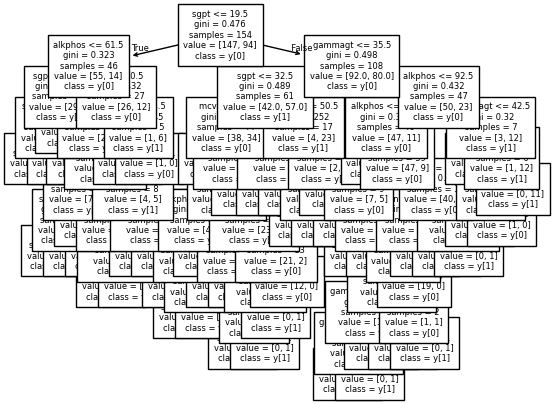

In [5]:
# visualize tree
# Extract single tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = model.estimators_[5]     # 6th tree
plot_tree(estimator, 
          fontsize=6, 
          feature_names=df_X.columns.to_list(),
          class_names=True)
plt.show()